# Heat Map of vascular phenotypes genes (Pascal) intersection 
## PROBLEM: without merge cells => The image needs to be done manually on powerpoint: merge cells and colors
###### Last modification 18/10/2022

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from datetime import datetime

DATE = datetime.now().strftime("%Y-%m-%d")

In [215]:
df_both=pd.read_csv('/SSD/home/sofia/retina-phenotypes/complementary/GWAS_postprocessing/common_genes_path_snps/2022_08_12_both.csv', index_col=0)
df_values=pd.read_csv('/SSD/home/sofia/retina-phenotypes/complementary/GWAS_postprocessing/common_genes_path_snps/intersections_main_v2.csv', index_col=0)
df_names=pd.read_csv('/SSD/home/sofia/retina-phenotypes/complementary/GWAS_postprocessing/common_genes_path_snps/intersections_genes_name_main_v2.csv', index_col=0)

In [216]:
### Convert the lists
for col in df_names.columns:
    df_names[col] = df_names[col].apply(eval)

In [253]:
df_aux_names = df_names.copy()

In [292]:
### Select only the first three genes, and delete the [' ']

for i in range(len(df_names)):
    for j in range(len(df_names)): 
        if len(df_names.iloc[i][j])>3:
            val=df_names.iloc[i][j] 
            #print(val)
            #print(*val[:3], sep = ", " ) 
            df_aux_names.iloc[i][j]='\n'.join(map(str, val[:3]))
            #print("\n")
        else:
            val=df_names.iloc[i][j] 
            df_aux_names.iloc[i][j]='\n'.join(map(str, val))

In [293]:
df_aux_names

,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter,eq_CRAE,eq_CRVE,ratio_CRAE_CRVE,mean_angle_taa,mean_angle_tva,bifurcations,D_A_std_std,D_V_std_std
medianDiameter_artery,HERC2\nLINC00461,HERC2,,LINC00461,LINC00461,,HERC2\nLINC00461,LINC00461,HERC2\nLINC00461,HERC2\nLINC00461,HERC2\nLINC00461
medianDiameter_vein,HERC2,HERC2\nOCA2\nRLBP1,,,,,HERC2,,HERC2\nOCA2,HERC2\nOCA2,HERC2\nOCA2
ratio_AV_medianDiameter,,,IZUMO1\nFGF21\nFUT1,,IZUMO1\nFGF21\nFUT1,IZUMO1\nFGF21\nFUT1,,,,,IZUMO1\nFGF21\nFUT1
eq_CRAE,LINC00461,,,ATOH7\nRP11-153K11.3\nMYPN,ATOH7\nRP11-153K11.3\nLINC00461,,LINC00461\nCTC-498M16.4,ATOH7\nRP11-153K11.3\nMYPN,LINC00461\nCTC-498M16.4,LINC00461\nCTC-498M16.4,LINC00461\nCTC-498M16.4
eq_CRVE,LINC00461,,FUT1\nIZUMO1\nFGF21,LINC00461\nCTC-498M16.4\nATOH7,FUT1\nIZUMO1\nFGF21,FUT1\nIZUMO1\nFGF21,LINC00461\nC14orf39\nCTD-2568P8.1,LINC00461\nC14orf39\nCTD-2568P8.1,LINC00461\nCTC-498M16.4,LINC00461\nNPLOC4\nCTC-498M16.4,FUT1\nIZUMO1\nFGF21
ratio_CRAE_CRVE,,,FGF21\nIZUMO1\nFUT1,,FGF21\nIZUMO1\nFUT1,FGF21\nIZUMO1\nFUT1,,,,,FGF21\nIZUMO1\nFUT1
mean_angle_taa,LINC00461\nHERC2,HERC2,,LINC00461\nCTC-498M16.4,CTD-2568P8.1\nC14orf39\nLINC00461,,CTD-2568P8.1\nC14orf39\nCENPW,CTD-2568P8.1\nC14orf39\nLINC00461,LINC00461\nCTC-498M16.4\nHERC2,LINC00461\nCTC-498M16.4\nRSPO2,CTD-2568P8.1\nC14orf39\nLINC00461
mean_angle_tva,LINC00461,,,ATOH7\nRP11-153K11.3\nPBLD,CTD-2568P8.1\nC14orf39\nSIX6,,CTD-2568P8.1\nC14orf39\nSIX6,CTD-2568P8.1\nC14orf39\nSIX6,LINC00461\nCTC-498M16.4,RSPO2\nEIF3E\nLINC00461,CTD-2568P8.1\nC14orf39\nSIX6
bifurcations,HERC2\nLINC00461,HERC2\nOCA2,,LINC00461\nCTC-498M16.4,LINC00461\nCTC-498M16.4,,HERC2\nLINC00461\nCTC-498M16.4,LINC00461\nCTC-498M16.4,HERC2\nACP1\nSH3YL1,HERC2\nOCA2\nLINC00461,HERC2\nACP1\nSH3YL1
D_A_std_std,LINC00461\nHERC2,OCA2\nHERC2,,LINC00461\nCTC-498M16.4,PDE6G\nNPLOC4\nOXLD1,,LINC00461\nRSPO2\nCTC-498M16.4,LINC00461\nRSPO2\nCTC-498M16.4,LINC00461\nOCA2\nCASC14,PDE6G\nNPLOC4\nOXLD1,PDE6G\nNPLOC4\nOXLD1


In [294]:
np_upper = np.triu(df_values)
#df = df1.fillna(df2)
df_upper=pd.DataFrame(np_upper)

np_lower = np.tril(df_aux_names, k=-1)
df_lower=pd.DataFrame(np_lower)


#np_upper.shape

i_upper = np.triu_indices(11)
np_final = np_lower
np_final[i_upper] = np_upper[i_upper]
df_c_m = pd.DataFrame(np_lower)
df_c_m.columns = df_names.columns
df_c_m.index = df_names.columns

In [295]:
np_c_m = np.asarray(df_c_m)

In [296]:
np_c_m

array([[2, 1, 0, 1, 1, 0, 2, 1, 2, 2, 2],
       ['HERC2', 3, 0, 0, 0, 0, 1, 0, 2, 2, 2],
       ['', '', 6, 0, 6, 6, 0, 0, 0, 0, 6],
       ['LINC00461', '', '', 25, 4, 0, 2, 8, 2, 2, 2],
       ['LINC00461', '', 'FUT1\nIZUMO1\nFGF21',
        'LINC00461\nCTC-498M16.4\nATOH7', 121, 24, 7, 9, 2, 8, 95],
       ['', '', 'FGF21\nIZUMO1\nFUT1', '', 'FGF21\nIZUMO1\nFUT1', 47, 0,
        0, 0, 0, 22],
       ['LINC00461\nHERC2', 'HERC2', '', 'LINC00461\nCTC-498M16.4',
        'CTD-2568P8.1\nC14orf39\nLINC00461', '', 25, 10, 3, 5, 9],
       ['LINC00461', '', '', 'ATOH7\nRP11-153K11.3\nPBLD',
        'CTD-2568P8.1\nC14orf39\nSIX6', '',
        'CTD-2568P8.1\nC14orf39\nSIX6', 27, 2, 4, 8],
       ['HERC2\nLINC00461', 'HERC2\nOCA2', '', 'LINC00461\nCTC-498M16.4',
        'LINC00461\nCTC-498M16.4', '', 'HERC2\nLINC00461\nCTC-498M16.4',
        'LINC00461\nCTC-498M16.4', 52, 5, 10],
       ['LINC00461\nHERC2', 'OCA2\nHERC2', '', 'LINC00461\nCTC-498M16.4',
        'PDE6G\nNPLOC4\nOXLD1', '', 'LIN

In [297]:
# Create an array to annotate the heatmap
#labels = (np.asarray(["{0}".format(symb)
#                      for symb in zip(np_c_m.flatten())])
#         ).reshape(11, 11)

In [298]:
### WHAT TO WRITE: labels contain the values/info that is going to be shown
labels = np_c_m

In [316]:
np_values_new = df_values.copy()

### change diagonal to have the same color:
np_values_new.values[[np.arange(np_values_new.shape[0])]*2] = 10
np_values_new = np.asarray(np_values_new)


#### HOW TO PLOT: results contain the values that is going to be used to plot the colours
results = np_values_new

#(np.asarray(["{0}".format(value) for value in np_values_new.flatten()]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


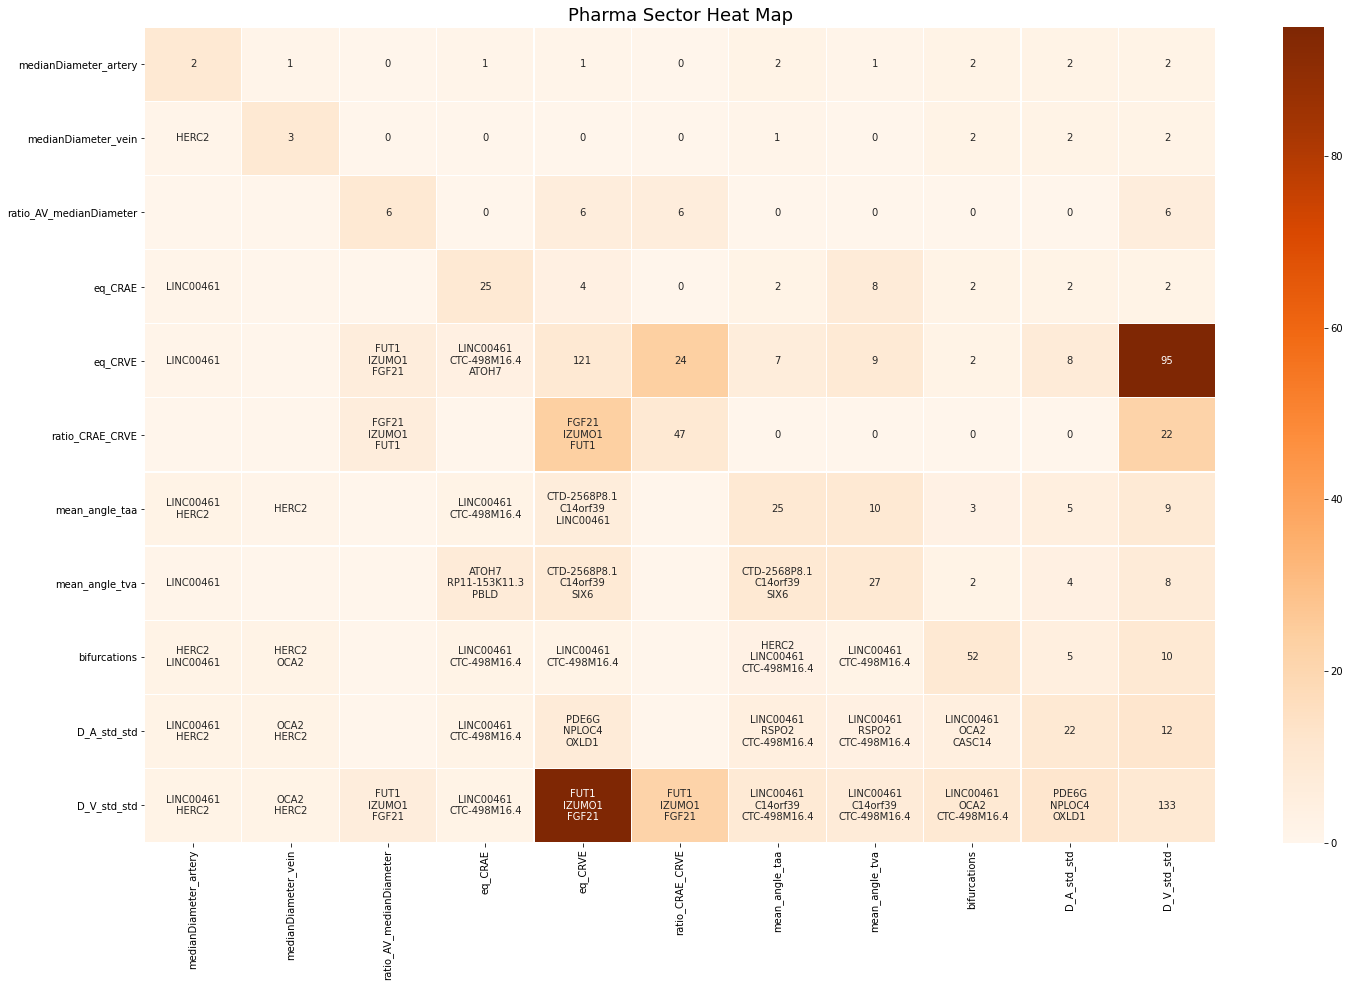

In [349]:
# Define the plot
fig, ax = plt.subplots(figsize=(24,15))

# Add title to the Heat map
#title = "Pharma Sector Heat Map"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])


x_axis_labels = list((df_names.columns))
y_axis_labels = list((df_names.index))
# Remove the axes
#ax.axis('off')


palette = sns.diverging_palette(60, 20, n=5)
sns.heatmap(results, annot=labels,fmt="",cmap='Oranges', linewidths=0.30, xticklabels=x_axis_labels, yticklabels=y_axis_labels)


# Use the heatmap function from the seaborn package
#matrix = np.triu(results)

#sns.heatmap(results, annot=labels,fmt="",cmap='Oranges', linewidths=0.30, xticklabels=x_axis_labels, yticklabels=y_axis_labels, mask=matrix)

#mask = np.tril(results)
#sns.heatmap(results, annot=labels,fmt="",cmap='Oranges', linewidths=0.30, xticklabels=x_axis_labels, yticklabels=y_axis_labels, mask=mask)

# Display the Pharma Sector Heatmap
plt.show()